# Get POI data from KOT open api

Get POI data for Seoul and put it to MongoDB (local)

In [110]:
# import libraries
import pandas as pd
import numpy as np
import pymongo
import time
import random
import json
import seaborn as sns

import urllib.request as MyURL
from bs4 import BeautifulSoup
from datetime import datetime
from matplotlib import pyplot as plt



SyntaxError: invalid syntax (<ipython-input-110-889a086f848b>, line 15)

In [2]:
# set mongodb
from pymongo import MongoClient 
client = MongoClient('localhost', 27017)

In [3]:
# set database name
db = client['cp_seoul']

In [4]:
# set collection name
collection = db['seoul']

In [5]:
# API key for data.go.kr
key = 'UiZuCz3TStJ3sDC1QBw4lZQYD%2BrwwjibhI5fSSaoGXjP3b00MseMmQ%2FNIPHLqZoVQgt8KVBAaoQ0ob7rQAMblg%3D%3D'

In [6]:
# API URL for get poi list 
#url = f'http://api.visitkorea.or.kr/openapi/service/rest/EngService/areaBasedList?ServiceKey={key}&contentTypeId=80&areaCode=1&sigunguCode=&cat1=&cat2=&cat3=&listYN=Y&MobileOS=ETC&MobileApp=TourAPI3.0_Guide&arrange=A&numOfRows=240&pageNo=1'

In [7]:
# Every place in Seoul
url = f'http://api.visitkorea.or.kr/openapi/service/rest/EngService/areaBasedList?ServiceKey={key}&contentTypeId=&areaCode=1&sigunguCode=&cat1=&cat2=&cat3=&listYN=Y&MobileOS=ETC&MobileApp=TourAPI3.0_Guide&arrange=A&numOfRows=1200&pageNo=1'

In [8]:
# get data from api server
response = MyURL.urlopen(url)

In [9]:
# parsing with BS4
results = BeautifulSoup(response, "html.parser")

In [10]:
# parse and make a document for mongo db
row = 0
for result in results.findAll('items'):
    for item in result.findAll('item'):
        row += 1
        record = {}
        for i in item:
            record[i.name] = i.contents[0]
#             print(i.name, i.contents)
#         print(record)
        collection.insert_one(record)

print(row)

1173


#### Get detail information for POI

In [6]:
a_record = (collection.find_one({'contentid': '1266515'}))

In [7]:
a_record

{'_id': ObjectId('5db26b80c36b1f23ca16b568'),
 'addr1': '20, Nambusunhwan-ro 64-gil, Yangcheon-gu, Seoul',
 'areacode': '1',
 'cat1': 'A02',
 'cat2': 'A0202',
 'cat3': 'A02020700',
 'contentid': '1266515',
 'contenttypeid': '76',
 'createdtime': '20110428140717',
 'firstimage': 'http://tong.visitkorea.or.kr/cms/resource/06/2611706_image2_1.bmp',
 'firstimage2': 'http://tong.visitkorea.or.kr/cms/resource/06/2611706_image2_1.bmp',
 'mapx': '126.8300634330',
 'mapy': '37.5274172505',
 'masterid': '1265735',
 'mlevel': '6',
 'modifiedtime': '20190830140812',
 'readcount': '12323',
 'sigungucode': '19',
 'tel': '+82-2-2604-3004',
 'title': 'Seoseoul Lake Park (서서울호수공원)',
 'zipcode': '07916'}

In [8]:
def get_detail(collection, content_id, type_id, key):
    url = f'http://api.visitkorea.or.kr/openapi/service/rest/EngService/detailCommon?ServiceKey={key}&contentTypeId=&contentId={content_id}&MobileOS=ETC&MobileApp=TourAPI3.0_Guide&defaultYN=Y&firstImageYN=Y&areacodeYN=Y&catcodeYN=Y&addrinfoYN=Y&mapinfoYN=Y&overviewYN=Y&transGuideYN=Y'
    response = MyURL.urlopen(url)
    results = BeautifulSoup(response, "html.parser")

    document = collection.find_one({'contentid': content_id})

#     print(url)
    for result in results.findAll('items'):
        for item in result.findAll('item'):
            for i in item:
                if len(i) > 0:
                    document[i.name] = i.contents[0]

    return document


In [9]:
a_record

{'_id': ObjectId('5db26b80c36b1f23ca16b568'),
 'addr1': '20, Nambusunhwan-ro 64-gil, Yangcheon-gu, Seoul',
 'areacode': '1',
 'cat1': 'A02',
 'cat2': 'A0202',
 'cat3': 'A02020700',
 'contentid': '1266515',
 'contenttypeid': '76',
 'createdtime': '20110428140717',
 'firstimage': 'http://tong.visitkorea.or.kr/cms/resource/06/2611706_image2_1.bmp',
 'firstimage2': 'http://tong.visitkorea.or.kr/cms/resource/06/2611706_image2_1.bmp',
 'mapx': '126.8300634330',
 'mapy': '37.5274172505',
 'masterid': '1265735',
 'mlevel': '6',
 'modifiedtime': '20190830140812',
 'readcount': '12323',
 'sigungucode': '19',
 'tel': '+82-2-2604-3004',
 'title': 'Seoseoul Lake Park (서서울호수공원)',
 'zipcode': '07916'}

In [10]:
get_detail(collection, '1266515', '76', key)

{'_id': ObjectId('5db26b80c36b1f23ca16b568'),
 'addr1': '20, Nambusunhwan-ro 64-gil, Yangcheon-gu, Seoul',
 'areacode': '1',
 'cat1': 'A02',
 'cat2': 'A0202',
 'cat3': 'A02020700',
 'contentid': '1266515',
 'contenttypeid': '76',
 'createdtime': '20110428140717',
 'firstimage': 'http://tong.visitkorea.or.kr/cms/resource/06/2611706_image2_1.bmp',
 'firstimage2': 'http://tong.visitkorea.or.kr/cms/resource/06/2611706_image2_1.bmp',
 'mapx': '126.8300634330',
 'mapy': '37.5274172505',
 'masterid': '1265735',
 'mlevel': '6',
 'modifiedtime': '20190830140812',
 'readcount': '12323',
 'sigungucode': '19',
 'tel': '+82-2-2604-3004',
 'title': 'Seoseoul Lake Park (서서울호수공원)',
 'zipcode': '07916',
 'directions': 'Hwagok Station (Seoul Subway Line 5), Exit 5.<br>Take Bus No. 652, 6627 or 6625, and get off at Seoseoul Lake Park Bus Stop.',
 'dongcode': '16',
 'homepage': '<a href="http://www.yangcheon.go.kr/" target="_blank" class="web" title="new window popup">www.yangcheon.go.kr</a> (Korean, Engl

#### Loop through for all POIs in seoul


In [16]:
cursors = collection.find()

In [18]:
print(f'start at : {datetime.now()}')
row = 0

new_collection = db['seoul_poi']

for cursor in cursors:
    content_id = cursor['contentid']
    type_id = cursor['contenttypeid']

    row += 1
        
    poi_detail = get_detail(collection, content_id, type_id, key)
    new_collection.insert_one(poi_detail)
    print(f'{row} : update {content_id} at {datetime.now()}')
    
#     new_value = {'$set': get_detail(collection, content_id, type_id, key)}
#     content_query = {'contentid': content_id}
#     collection.update_one(content_query, new_value)

    #time.sleep(random.randint(4, 10))
    
print(f'end at : {datetime.now()}')

    

start at : 2019-12-07 22:01:55.946610
1 : update 932089 at 2019-12-07 22:01:56.157793
2 : update 1061818 at 2019-12-07 22:01:56.371404
3 : update 1373717 at 2019-12-07 22:01:56.551202
4 : update 610704 at 2019-12-07 22:01:56.645579
5 : update 561382 at 2019-12-07 22:01:56.751671
6 : update 2542881 at 2019-12-07 22:01:56.868290
7 : update 1030341 at 2019-12-07 22:01:57.062848
8 : update 264309 at 2019-12-07 22:01:57.314807
9 : update 1747593 at 2019-12-07 22:01:57.406383
10 : update 2442529 at 2019-12-07 22:01:57.532317
11 : update 552964 at 2019-12-07 22:01:57.665065
12 : update 2357787 at 2019-12-07 22:01:57.803453
13 : update 1017463 at 2019-12-07 22:01:57.936278
14 : update 2442425 at 2019-12-07 22:01:58.120002
15 : update 351130 at 2019-12-07 22:01:58.245335
16 : update 1996499 at 2019-12-07 22:01:58.361646
17 : update 1859686 at 2019-12-07 22:01:58.533190
18 : update 2638241 at 2019-12-07 22:01:58.650563
19 : update 736274 at 2019-12-07 22:01:58.787751
20 : update 1024886 at 2019-

166 : update 2573681 at 2019-12-07 22:02:19.975597
167 : update 1019579 at 2019-12-07 22:02:20.098546
168 : update 556139 at 2019-12-07 22:02:20.240104
169 : update 1841829 at 2019-12-07 22:02:20.338927
170 : update 1351623 at 2019-12-07 22:02:20.434510
171 : update 1960861 at 2019-12-07 22:02:20.576993
172 : update 1979606 at 2019-12-07 22:02:20.678438
173 : update 988241 at 2019-12-07 22:02:20.796232
174 : update 1986379 at 2019-12-07 22:02:20.902962
175 : update 1989069 at 2019-12-07 22:02:20.994424
176 : update 1993531 at 2019-12-07 22:02:21.106229
177 : update 1942359 at 2019-12-07 22:02:21.218143
178 : update 1494224 at 2019-12-07 22:02:21.325624
179 : update 2521995 at 2019-12-07 22:02:21.419835
180 : update 1371835 at 2019-12-07 22:02:21.601407
181 : update 2495919 at 2019-12-07 22:02:21.727272
182 : update 1922758 at 2019-12-07 22:02:21.852919
183 : update 1336156 at 2019-12-07 22:02:21.941236
184 : update 1327024 at 2019-12-07 22:02:22.045821
185 : update 1858032 at 2019-12-0

329 : update 349365 at 2019-12-07 22:02:39.612315
330 : update 1918985 at 2019-12-07 22:02:39.733972
331 : update 1327002 at 2019-12-07 22:02:39.831073
332 : update 2024644 at 2019-12-07 22:02:39.954288
333 : update 351701 at 2019-12-07 22:02:40.096955
334 : update 2542407 at 2019-12-07 22:02:40.271999
335 : update 349331 at 2019-12-07 22:02:40.381075
336 : update 349280 at 2019-12-07 22:02:40.493532
337 : update 349361 at 2019-12-07 22:02:40.633855
338 : update 349319 at 2019-12-07 22:02:40.753285
339 : update 1349213 at 2019-12-07 22:02:40.871305
340 : update 2596304 at 2019-12-07 22:02:40.980030
341 : update 349371 at 2019-12-07 22:02:41.079738
342 : update 349348 at 2019-12-07 22:02:41.233073
343 : update 349300 at 2019-12-07 22:02:41.363839
344 : update 1858252 at 2019-12-07 22:02:41.478168
345 : update 349004 at 2019-12-07 22:02:41.646261
346 : update 1977149 at 2019-12-07 22:02:41.775517
347 : update 349265 at 2019-12-07 22:02:41.875902
348 : update 1002480 at 2019-12-07 22:02:4

491 : update 769297 at 2019-12-07 22:03:01.219118
492 : update 2434936 at 2019-12-07 22:03:01.346204
493 : update 409242 at 2019-12-07 22:03:01.450822
494 : update 1537085 at 2019-12-07 22:03:01.579875
495 : update 686625 at 2019-12-07 22:03:01.718523
496 : update 293089 at 2019-12-07 22:03:01.827474
497 : update 1079161 at 2019-12-07 22:03:01.949529
498 : update 686462 at 2019-12-07 22:03:02.086201
499 : update 985439 at 2019-12-07 22:03:02.250513
500 : update 985518 at 2019-12-07 22:03:02.388445
501 : update 292883 at 2019-12-07 22:03:02.530885
502 : update 264464 at 2019-12-07 22:03:02.643465
503 : update 2603951 at 2019-12-07 22:03:02.758898
504 : update 2005103 at 2019-12-07 22:03:02.870866
505 : update 349278 at 2019-12-07 22:03:03.009132
506 : update 1034770 at 2019-12-07 22:03:03.155736
507 : update 616931 at 2019-12-07 22:03:03.259984
508 : update 268094 at 2019-12-07 22:03:03.371262
509 : update 1326661 at 2019-12-07 22:03:03.488358
510 : update 1326664 at 2019-12-07 22:03:03

653 : update 1021691 at 2019-12-07 22:03:22.095735
654 : update 2525643 at 2019-12-07 22:03:22.184201
655 : update 767100 at 2019-12-07 22:03:22.405654
656 : update 1989051 at 2019-12-07 22:03:22.507079
657 : update 1748006 at 2019-12-07 22:03:22.616230
658 : update 1348713 at 2019-12-07 22:03:22.742118
659 : update 268152 at 2019-12-07 22:03:22.861789
660 : update 1215385 at 2019-12-07 22:03:22.984452
661 : update 268140 at 2019-12-07 22:03:23.064229
662 : update 1962734 at 2019-12-07 22:03:24.185976
663 : update 1845467 at 2019-12-07 22:03:24.295294
664 : update 1853437 at 2019-12-07 22:03:24.391776
665 : update 268074 at 2019-12-07 22:03:24.487845
666 : update 1934745 at 2019-12-07 22:03:24.597413
667 : update 268178 at 2019-12-07 22:03:24.703699
668 : update 985484 at 2019-12-07 22:03:24.795945
669 : update 268124 at 2019-12-07 22:03:24.891028
670 : update 985608 at 2019-12-07 22:03:25.000545
671 : update 349344 at 2019-12-07 22:03:25.139201
672 : update 349294 at 2019-12-07 22:03:

815 : update 1930111 at 2019-12-07 22:03:43.712235
816 : update 2378097 at 2019-12-07 22:03:43.840468
817 : update 1747979 at 2019-12-07 22:03:44.003595
818 : update 1621870 at 2019-12-07 22:03:44.105361
819 : update 264594 at 2019-12-07 22:03:44.211359
820 : update 1911833 at 2019-12-07 22:03:44.357457
821 : update 1000217 at 2019-12-07 22:03:44.450161
822 : update 293069 at 2019-12-07 22:03:44.596231
823 : update 1905560 at 2019-12-07 22:03:44.709109
824 : update 2469845 at 2019-12-07 22:03:44.891082
825 : update 1939723 at 2019-12-07 22:03:45.019656
826 : update 1393354 at 2019-12-07 22:03:45.127212
827 : update 1942353 at 2019-12-07 22:03:45.236602
828 : update 1748369 at 2019-12-07 22:03:45.315913
829 : update 1854180 at 2019-12-07 22:03:45.424832
830 : update 655064 at 2019-12-07 22:03:45.505876
831 : update 2394567 at 2019-12-07 22:03:45.593598
832 : update 790375 at 2019-12-07 22:03:45.689774
833 : update 1116940 at 2019-12-07 22:03:45.823367
834 : update 1371199 at 2019-12-07 

977 : update 349284 at 2019-12-07 22:04:07.807882
978 : update 2582971 at 2019-12-07 22:04:07.988349
979 : update 2392391 at 2019-12-07 22:04:08.157042
980 : update 1846453 at 2019-12-07 22:04:08.359555
981 : update 268131 at 2019-12-07 22:04:08.529859
982 : update 349276 at 2019-12-07 22:04:08.668350
983 : update 2545701 at 2019-12-07 22:04:08.869046
984 : update 349402 at 2019-12-07 22:04:09.065213
985 : update 1120947 at 2019-12-07 22:04:09.226965
986 : update 834090 at 2019-12-07 22:04:09.512827
987 : update 1034624 at 2019-12-07 22:04:09.672951
988 : update 1338769 at 2019-12-07 22:04:09.829515
989 : update 1940400 at 2019-12-07 22:04:09.990139
990 : update 985541 at 2019-12-07 22:04:10.208131
991 : update 1823985 at 2019-12-07 22:04:10.356839
992 : update 1002629 at 2019-12-07 22:04:10.505000
993 : update 1159288 at 2019-12-07 22:04:10.666233
994 : update 582457 at 2019-12-07 22:04:10.850650
995 : update 1142329 at 2019-12-07 22:04:11.042181
996 : update 2542399 at 2019-12-07 22:

In [11]:
# Retrieve data sample(경복궁)
new_collection = db['seoul_poi']
cursors = new_collection.find({'contentid': '264337'})

In [12]:
for cursor in cursors:
    cursor.pop('_id')
    app_json = json.dumps(cursor, sort_keys=True)
    print(app_json)

{"addr1": "161, Sajik-ro, Jongno-gu, Seoul", "areacode": "1", "cat1": "A02", "cat2": "A0201", "cat3": "A02010100", "contentid": "264337", "contenttypeid": "76", "createdtime": "20110225172850", "directions": "[Subway]<br />\nGyeongbokgung Station (Seoul Subway Line 3) and Exit 5.<br/>\nAnguk Station (Seoul Subway Line 3) and Exit 1. <br /><br />\n\n[Bus]<br />\nTake Bus No. 1020, 7025,109, 171, 172, 601 or 606 and get off at Gyeongbokgung Palace Bus Stop.<br /><br />\n\nTake Jongno Bus No. 11 and get off at National Folk Musuem of Korea Bus Stop.", "dongcode": "36", "firstimage": "http://tong.visitkorea.or.kr/cms/resource/40/1568040_image2_1.jpg", "firstimage2": "http://tong.visitkorea.or.kr/cms/resource/40/1568040_image3_1.jpg", "homepage": "<a title=\"New window popup\" href=\"http://www.royalpalace.go.kr/\" target=\"_blank\">www.royalpalace.go.kr</a> (Korean, English)<br>\n <a title=\"New window popup\" href=\"http://www.palaceguide.or.kr/\" target=\"_blank\">www.palaceguide.or.kr</

### Understanding the dataset

In [13]:
# Put the data into dataframe
cursor = new_collection.find()

# Expand the cursor and construct the DataFrame
df =  pd.DataFrame(list(cursor))

# Delete the _id
del df['_id']


In [14]:
cursor = new_collection.find({'title': {"$regex": u"Bongeunsa"}})

In [15]:
for row in cursor:
    print(row['title'], row['contentid'])

Bongeunsa Temple (Seoul) (봉은사 (서울)) 264594


In [16]:
df.head().T

,0,1,2,3,4
addr1,"38, Donggyo-ro 29-gil, Mapo-gu, Seoul","31, Daehak-ro 12-gil, Jongno-gu, Seoul","3rd floor, 26, Eulji-ro 9-gil, Jung-gu, Seoul","22 Apgujeong-ro 8-gil, Gangnam-gu, Seoul","13th floor, 57, Myeongdong 2-gil, Jung-gu, Seoul"
addr2,NaN,NaN,NaN,NaN,NaN
areacode,1,1,1,1,1
cat1,A05,A02,B02,A04,B02
cat2,A0502,A0206,B0201,A0401,B0201
cat3,A05020900,A02060600,B02010900,A04010600,B02010900
contentid,2480979,1240735,2444381,2009231,2542774
contenttypeid,82,78,80,79,80
createdtime,20170214145634,20110324102837,20161201153253,20150610141921,20180412102855
directions,[Subway]<br />\nHongik Univ. Station (Seoul Su...,[Subway]<br>Haehwa Station (Seoul Subway Line ...,Available,[Subway]<br>\nSinsa Station (Seoul Subway Line...,Available


In [17]:
content_types = {
    82: "음식(82)Dining",
    76: "관광지(76)TouristAttractions",
    79: "쇼핑(79)Shopping",
    78: "문화시설(78)Cultural Facilities",
    80: "숙박(80)Accommodation",
    85: "축제/공연/행사(85)Festivals/Events/Performances",
    75: "레포츠(75)Leisure/Sports",
    77: "교통(77)Transportation",    
}


In [18]:
# Histogram for readcount
content_type_count = df.contenttypeid.value_counts()

In [19]:
content_type_count

82    263
76    262
79    215
78    161
80    156
85     87
75     26
77     11
Name: contenttypeid, dtype: int64

In [20]:
# 음식 카테고리만 출력
for _, row in df.iterrows():
    if row['contenttypeid'] == '82':
        print(row['title'])

17℃ (17도씨)
63 Buffet Pavilion (63뷔페 파빌리온)
Aedogin (에도긴)
Ali Baba (알리바바)
Alla Prima (알라 프리마)
Andong Guksi (안동국시)
Aoi Tori (아오이토리)
Areumdaun Cha Bangmulgwan (Beautiful Tea Museum) (아름다운차박물관)
Arirang (아리랑)
B-hind (비하인드)
Baba India - Gangnam Branch (바바인디아 (강남역점))
Badalbi (바달비)
Baekje Samgyetang (백제삼계탕)
Baengnyeon Samgyetang (백년토종삼계탕)
Baengnyeonok (백년옥)
Baerlin (베어린)
Balwoo Gongyang (사찰음식 전문점 발우공양)
Bistro74 (비스트로74)
Bo Reum Soei (보름쇠)
Bongpiyang (Bangi Branch) (봉피양 방이점)
Bongraeheon (Mayfield Hotel) (봉래헌(메이필드호텔))
Bua (부아)
Buchon Yukhoe (부촌육회)
Bugakjeong Isang Galbi (북악정-이상갈비)
Bugeogukjip (북어국집)
Bukmakgol (북막골)
BuonaSera (보나세라)
Busan Sikdang (부산식당)
Busanbokjip (부산복집)
Ca'del Lupo (까델루뽀)
Cacao Boom (Itaewon Branch) (카카오봄(이태원점))
Cacaodada (카카오 다다)
Café De Paris (카페드파리)
Café Moon (달 카페)
Canadian Lobster (카나디안 랍스터)
Châtaigne (샤떼뉴)
Chakraa (Hannam Branch) (차크라(한남점))
Chammanna (참만나)
Chamsutgol (참숯골)
Chanyangjip (찬양집)
Cheongsu Hoetjip (Formerly Eushim) (청수횟집)
Chikibaitu (Chickyx2) - Ewha Woman's Univ

### Visualization with folium

In [21]:
import folium

In [22]:
df.mapx = pd.to_numeric(df.mapx)

In [23]:
df.mapy = pd.to_numeric(df.mapy)

In [24]:
center_coord = (df.mapy.mean(), df.mapx.mean())

In [25]:
center_coord

(37.51909343531988, 126.88651275411688)

In [26]:
map = folium.Map(location=center_coord, zoom_start=12)

In [27]:
for _, row in df.iterrows():
    
    icon = folium.Icon(color='blue')
    if row['contenttypeid'] == '82':
        # Food
        icon.color = 'red'
    elif row['contenttypeid'] == '76':
        # 관광지
        icon.color = 'green'
    elif row['contenttypeid'] == '79':
        # 쇼핑
        icon.color = 'orange'
    elif row['contenttypeid'] == '80':
        # 숙박
        icon.color = 'purple' 
    
    if not (np.isnan(row['mapy']) or np.isnan(row['mapx'])):
        folium.Marker(location=[row['mapy'], row['mapx']], 
                      popup=row['title'], 
                      icon=icon).add_to(map)
    else:
        print(row['title'])


Art Korea Inc.(아트코리아)
Hapjeong-dong Café Street (합정동 카페거리)
International Seon Center (국제선센터)
Inwoo House (인우하우스)


In [28]:
display(map)

### Vectorizing by TD-IDF values with overview

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import stop_words
from sklearn.decomposition import TruncatedSVD

from nltk.tokenize import word_tokenize

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [30]:
ngrams_1 = {
    'ngram_range': (1, 1),
    'stop_words': 'english',
    'dtype': 'int32',
    'strip_accents': 'unicode',
    'decode_error': 'replace',
    'analyzer': 'word',
    'min_df': 2
}

In [31]:
tfidf = TfidfVectorizer(ngrams_1)

In [32]:
# Replace NA with ''
df.overview = df.overview.fillna('')

In [33]:
# get TF-IDF values
tfidf_values = tfidf.fit_transform(df['overview'])

In [34]:
tfidf_values.shape

(1181, 9988)

In [35]:
# Reduce dimensions for Chart
svd = TruncatedSVD(n_components=3)
svd_values = svd.fit_transform(tfidf_values)

In [36]:
svd_values

array([[ 0.14462707, -0.00641033,  0.07430818],
       [ 0.24511805, -0.06124419, -0.04698641],
       [ 0.41434115,  0.16285021, -0.00892678],
       ...,
       [ 0.        , -0.        ,  0.        ],
       [ 0.        , -0.        ,  0.        ],
       [ 0.        , -0.        ,  0.        ]])

In [37]:
# Coloring by category: Food : Red, Sightseeing : Green, Shopping : Blue, Lodging : Purple
C = []
for idx, row in df.iterrows():    
    if row['contenttypeid'] == '82':
        # Food
        C.append('r')
    elif row['contenttypeid'] == '76':
        C.append('g')
    elif row['contenttypeid'] == '79':
        # 쇼핑
        C.append('b')
    elif row['contenttypeid'] == '80':
        # 숙박
        C.append('purple')
    else:
        C.append('gray')
        

In [38]:
# Set list for chart (X, Y, Z and Colors)
X = []
Y = []
Z = []
CC = []

for idx, c in enumerate(['r', 'g', 'b', 'purple', 'gray']):
    x = []
    y = []
    z = []
    cc = []
    for id, i in enumerate(svd_values):
        if C[id] == c:
            x.append(i[0])
            y.append(i[1])            
            z.append(i[2])
            cc.append(C[idx])
    X.append(x)
    Y.append(y)
    Z.append(z)
    CC.append(cc)

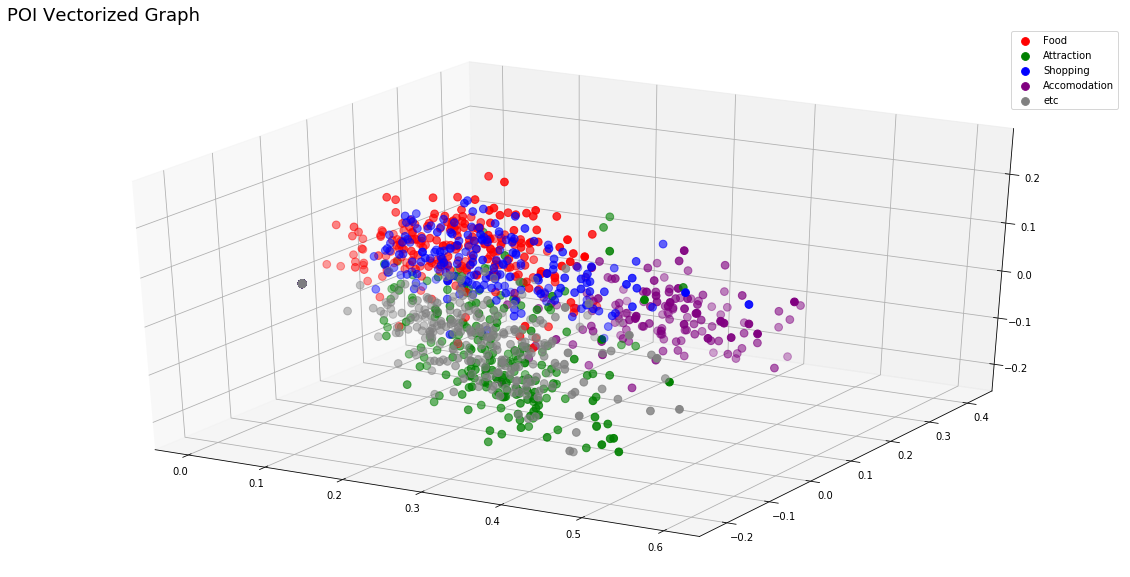

In [39]:
fig = plt.figure(figsize=(20,10))
labels = ['Food', 'Attraction', 'Shopping', 'Accomodation', 'etc']
ax = fig.add_subplot(111, projection='3d')
for idx, c in enumerate(['r', 'g', 'b', 'purple', 'gray']):
    ax.scatter(X[idx], Y[idx], Z[idx], color=c, s=60, label=labels[idx])

ax.legend()
ax.set_title('POI Vectorized Graph', fontdict={'fontsize': 18}, loc='left')
plt.show()


#### Compare vectors

In [54]:
# Find index value for POI
df[df['title'].str.contains('강남')][['title', 'contentid', 'overview']]

,title,contentid,overview
51,Baba India - Gangnam Branch (바바인디아 (강남역점)),556174,Baba India is a traditional Indian cuisine res...
72,Best Western Premier Gangnam Hotel (베스트웨스턴 프리미...,782947,Best Western International is a worldwide chai...
293,Gangnam (강남),264571,Gangnam Subway Station area is the prime distr...
294,Gangnam Station Underground Shopping Center (강...,2021659,Consumers in their 20s to 30s are frequent vis...
320,Goto Mall (Gangnam Terminal Underground Shoppi...,1356028,Gangnam Terminal Underground Shopping Center i...
562,Kakao Friends Gangnam Flagship Store (카카오프렌즈 강...,2579444,Kakao Friends Gangnam Flagship Store features ...
606,Kumkang - Gangnam Branch (Main store) (금강제화 (강...,1326661,Kumkang Shoes is Korea's leading fashion retai...
784,"Novotel Ambassador Gangnam, Seoul (노보텔 앰배서더 강남)",349257,"The Novotel Ambassador Gangnam, Seoul is one o..."
995,Seven Luck Casino - Gangnam COEX (세븐럭카지노(강남코엑스점)),495641,"Everyone’s favorite, Korean Las Vegas – Seven ..."
999,Sheraton Seoul Palace Gangnam Hotel (쉐라톤 서울 팔래...,349263,


In [41]:
X = [i[0] for i in svd_values]
Y = [i[1] for i in svd_values]
Z = [i[2] for i in svd_values]

def compare_vectors(idx_1, idx_2):
    value_a = (X[idx_1], Y[idx_1], Z[idx_1])
    value_b = (X[idx_2], Y[idx_2], Z[idx_2])
    
    # !!!!check how to get_distance between 3d vectors
    diff = abs(X[idx_1] - X[idx_2]) + abs(Y[idx_1] - Y[idx_2]) + abs(Z[idx_1] - Z[idx_2])
    
    return diff, value_a, value_b

In [48]:
# 경복궁 vs 남산타워
compare_vectors(359, 748)

(0.3202112623481169,
 (0.38349767283731007, -0.1874609239716139, -0.13326057824500293),
 (0.28595877688383714, -0.022481104495998654, -0.07556803132597419))

In [50]:
# 경복궁 vs 창경궁
compare_vectors(359, 133)

(0.12770068721332395,
 (0.38349767283731007, -0.1874609239716139, -0.13326057824500293),
 (0.49915939717612356, -0.19056169494915237, -0.12432238634803093))

In [52]:
# 남산타워 vs 롯데월드타워
compare_vectors(748, 653)

(0.20388169189513927,
 (0.28595877688383714, -0.022481104495998654, -0.07556803132597419),
 (0.4288209325940513, -0.06938827768055864, -0.06145566832560904))

In [55]:
# 북촌한옥마을 vs 강남
compare_vectors(98, 293)

(0.3442437311263957,
 (0.2812253708114887, -0.06968002673243612, 0.05064407053445809),
 (0.3696432957801617, 0.06806649977653466, -0.06743520911429383))

#### Make function for get similar places

In [56]:
# extract vectors to tuple array
vectors = [(i[0], i[1], i[2]) for i in svd_values]

In [95]:
# get similar places function
def get_similar(index):
    """Returns similar places of indiced place"""
    X = vectors[index][0]
    Y = vectors[index][1]
    Z = vectors[index][2]
 
    distances = []
    for i, value in enumerate(vectors):
        distance = (abs(X - value[0]) + abs(Y - value[1]) + abs(Z - value[2]), i)
        distances.append(distance)

    top5_similars = [i[1] for i in sorted(distances)[0:6]]
    
    distance_df = pd.DataFrame(distances)
    
    result = pd.DataFrame(df.loc[top5_similars][['title', 'contentid', 'overview']])
    result = pd.merge(result, distance_df.loc[top5_similars], left_index=True, right_index=True)
    
    result = result.rename({0:'distance'}, axis='columns')

    return result


#### Get similar places

In [102]:
# 북촌한옥마을
get_similar(98)

,title,contentid,overview,distance,1
98,Bukchon Hanok Village (북촌한옥마을),561382,"Surrounded by Gyeongbokgung Palace, Changdeokg...",0.000000,98
71,Beautiful Tea Museum (아름다운 차박물관),268218,"Located in Insa-dong, The Beautiful Tea Museum...",0.018895,71
936,Seoul Folk Flea Market - Traditional Arts & C...,1371199,The Traditional Arts & Crafts Studio at Seoul ...,0.037363,936
480,Injeongwon - Gildong Main Branch (인정원-길동본점),554553,"'Vietnamssam Injeongwon,' keeping the new tren...",0.048083,480
600,Korean Museum of Straw and Life (짚풀생활사박물관),2603951,Korean Museum of Straw and Life is a private m...,0.054291,600
818,Passion 5 (패션5),1151309,Passion 5 is located near Hangangjin Station i...,0.055739,818


In [103]:
# 남산서울타워
get_similar(748)

,title,contentid,overview,distance,1
748,Namsan Seoul Tower (남산서울타워),264550,Namsan Seoul Tower was the first tower-type to...,0.000000,748
755,Nanji Hangang Park (Nanji Camping Site) (한강시민공...,767100,"As part of the Hangang Renaissance project, Na...",0.028913,755
1043,Suraksan Mountain (수락산),1253587,Along with the other great mountains near Seou...,0.042348,1043
161,Children’s Grand Park (서울 어린이대공원),1051832,"Situated in Gwangjin-gu, Seoul Children’s Gran...",0.042913,161
217,Dobongsan Mountain (도봉산),1742421,"Dobongsan Mountain, located northeast of Bukha...",0.044310,217
967,Seoul Namsan Gugakdang (Traditional Theater) (...,989893,Seoul Namsan Gukakdang (Traditional Theater) w...,0.044318,967


In [104]:
# 롯데월드타워
get_similar(653)

,title,contentid,overview,distance,1
653,Lotte World Tower Seoul Sky (롯데월드타워 서울스카이),2493015,Seoul Sky is located on floors 117-123 of Lott...,0.000000,653
886,Sang Sang Tok Tok Gallery (상상톡톡 미술관),1114538,"The Children’s Gallery, located in Seoul’s ‘No...",0.047217,886
872,Samcheonggak (삼청각),268177,Reflecting its name (literally the ‘House with...,0.053830,872
387,Hangaram Art Museum in Seoul Arts Center (예술의전...,1312802,"Hangaram Art Museum, located in the left wing ...",0.056085,387
721,Myeongdong Nanta Theatre (명동난타극장),651452,The Myeongdong Nanta Theatre is located on the...,0.058683,721
338,Gwanaksan Mountain (관악산),1562674,"At 632.2 meters in x_height, Gwanaksan Mountai...",0.065208,338


In [105]:
# 경복궁
get_similar(359)

,title,contentid,overview,distance,1
359,Gyeongbokgung Palace (경복궁),264337,"Built in 1395, Gyeongbokgung Palace is also co...",0.000000,359
245,Doseonsa Temple (도선사),1348684,"Doseonsa Temple was established 1,100 years ag...",0.038082,245
710,"Museum of Art, Seoul National University (서울대학...",1752538,"Museum of Art, Seoul National University was e...",0.041790,710
964,Seoul Museum of History (서울역사박물관),268127,Seoul Museum of History captures the tradition...,0.043111,964
546,Jongmyo Shrine [UNESCO World Heritage] (종묘 [유네...,264351,Jongmyo Shrine was a primary place of worship ...,0.053535,546
147,Cheonggyecheon Museum (청계천박물관),268210,The Cheonggyecheon Museum officially opened on...,0.054483,147


#### TF-IDF gives meaningful result about similarity between POIs, let's make a web app with this model